In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
from Module.HeadRegion import GetHeadDict
from keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.patches as patches

In [3]:
TestVideoPos = r'E:\GithubProjects\KagglePractice\HelmetDetection2\TestVideo.mp4'

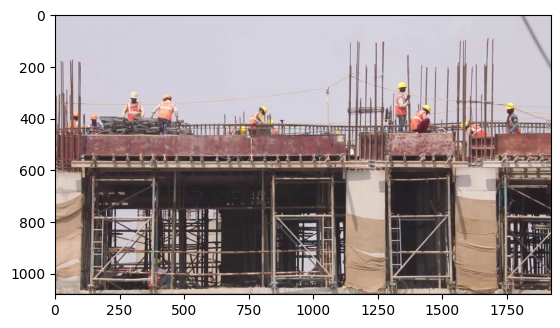

In [4]:
cap = cv.VideoCapture(TestVideoPos)

ret, img = cap.read()
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [5]:
HeadDict = GetHeadDict(img, (100, 100), 10)

In [7]:
len(HeadDict['headlist'])

5

In [11]:
model = load_model(r'E:\GithubProjects\KagglePractice\HelmetDetection2\HelmetModel.h5')

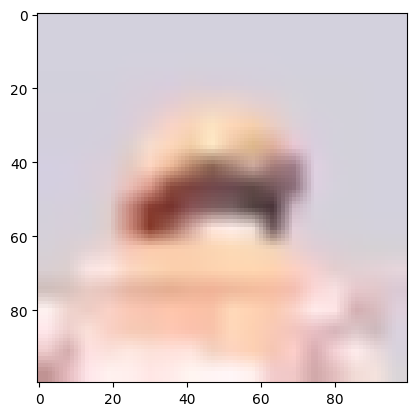

In [13]:
plt.imshow(cv.cvtColor(HeadDict['headlist'][0]['head'], cv.COLOR_BGR2RGB))

In [16]:
model.predict(np.array(
	[HeadDict['headlist'][0]['head']]
))

1/1 [==============================] - 0s 164ms/step


array([[0.60298556]], dtype=float32)

1/1 [==============================] - 0s 42ms/step


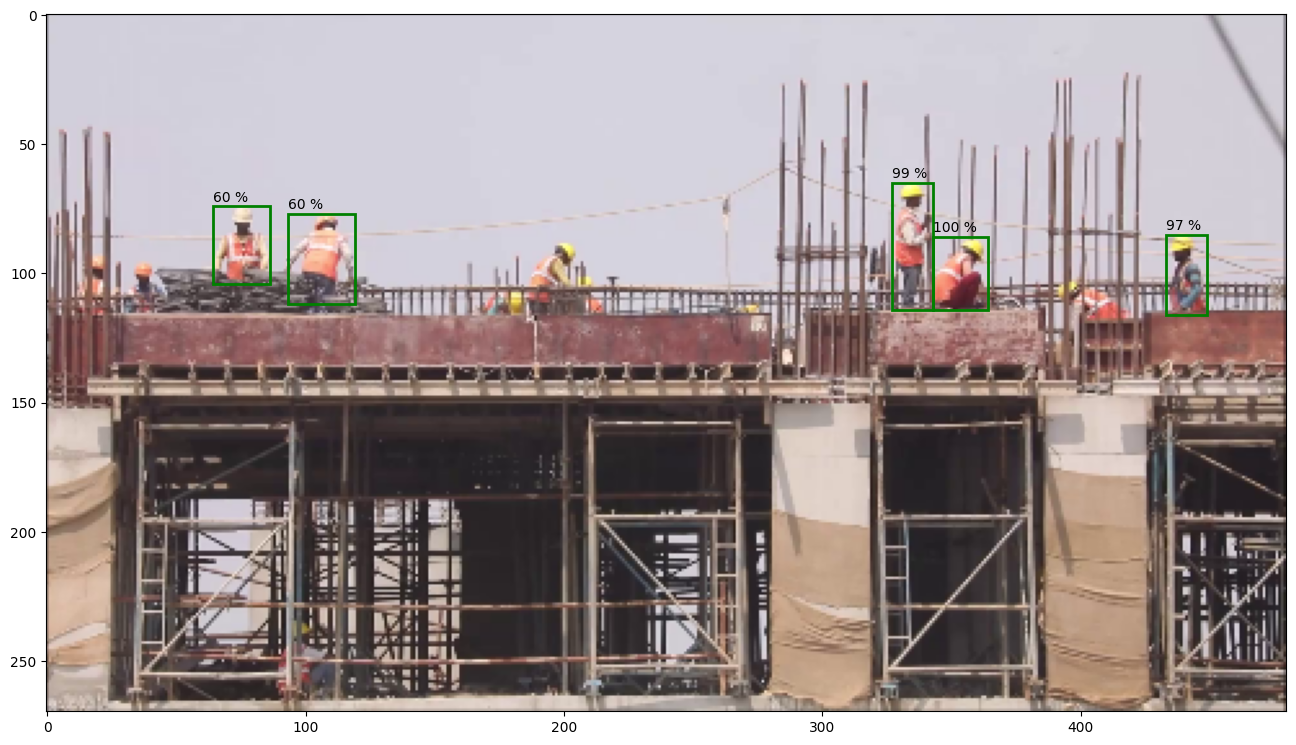

In [35]:
fig, ax = plt.subplots(1, figsize=(16, 16))
Height, Width = img.shape[:2]
img = cv.resize(img, (480, int(480 * Height / Width)))
ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

for head in HeadDict['headlist']:
	Prediction = model.predict(np.array(
		[head['head']]
	))

	Color = "red" if float(Prediction[0][0]) < 0.5 else "green"
	x0, y0, x1, y1 = head['bodypos']
	rect = patches.Rectangle((x0, y0), x1-x0, y1-y0, linewidth=2, edgecolor=Color, facecolor='none')
	ax.add_patch(rect)

	ax.text(x=x0,
			y=y0-2,
			s=f"{int(Prediction * 100)} %",
			color="black")

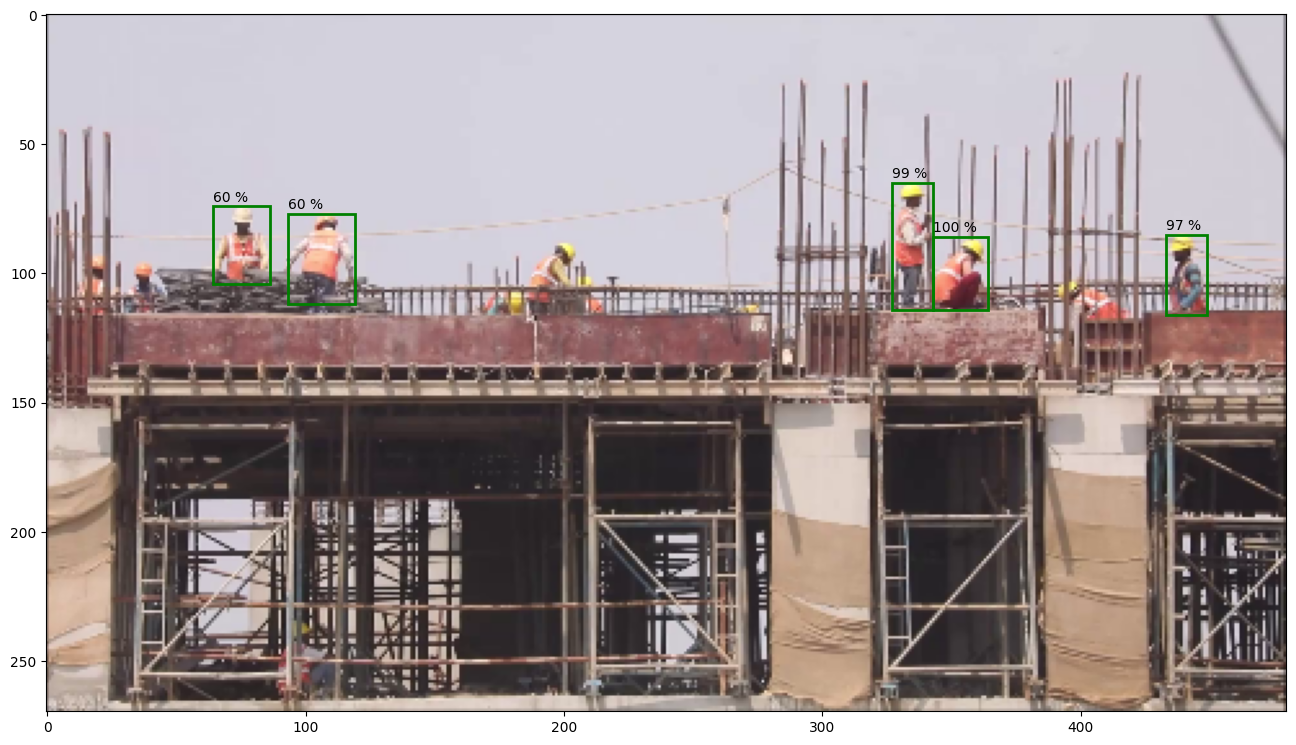

In [36]:
fig

In [37]:
from Module.ImagePrediction import GetPrediction

1/1 [==============================] - 0s 33ms/step


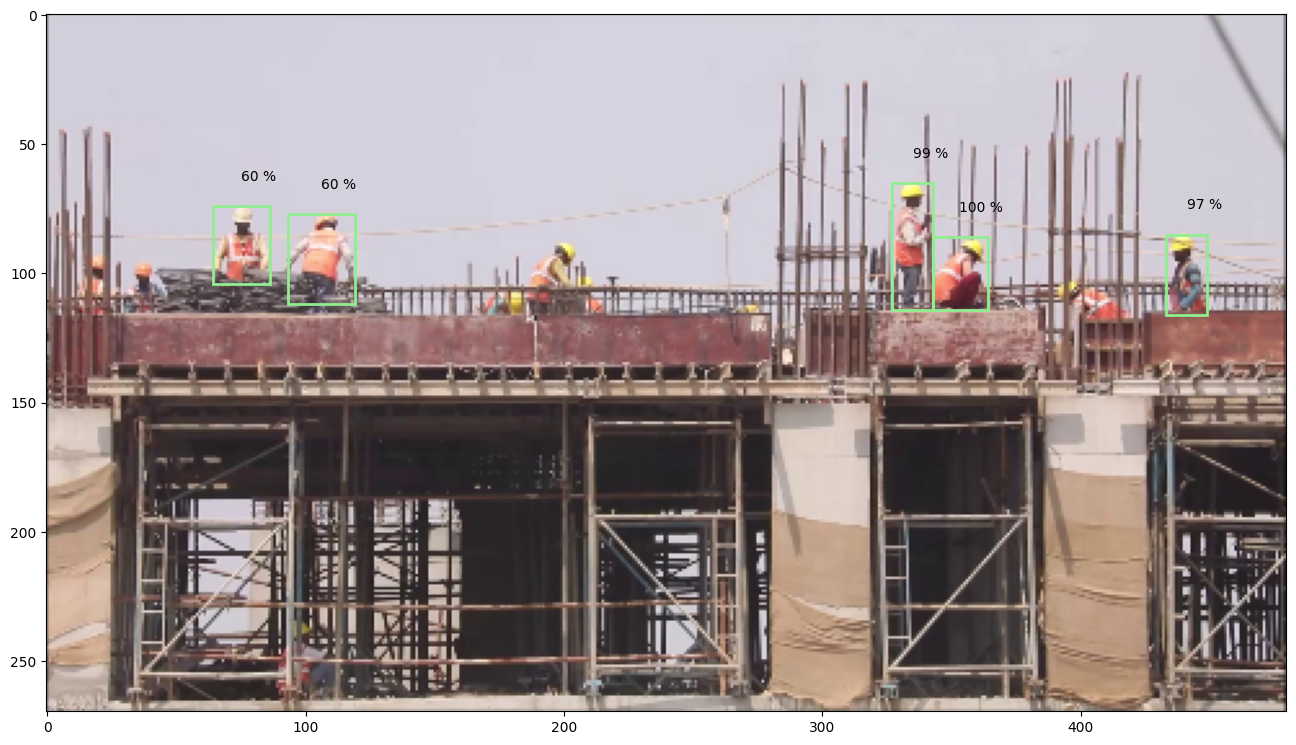

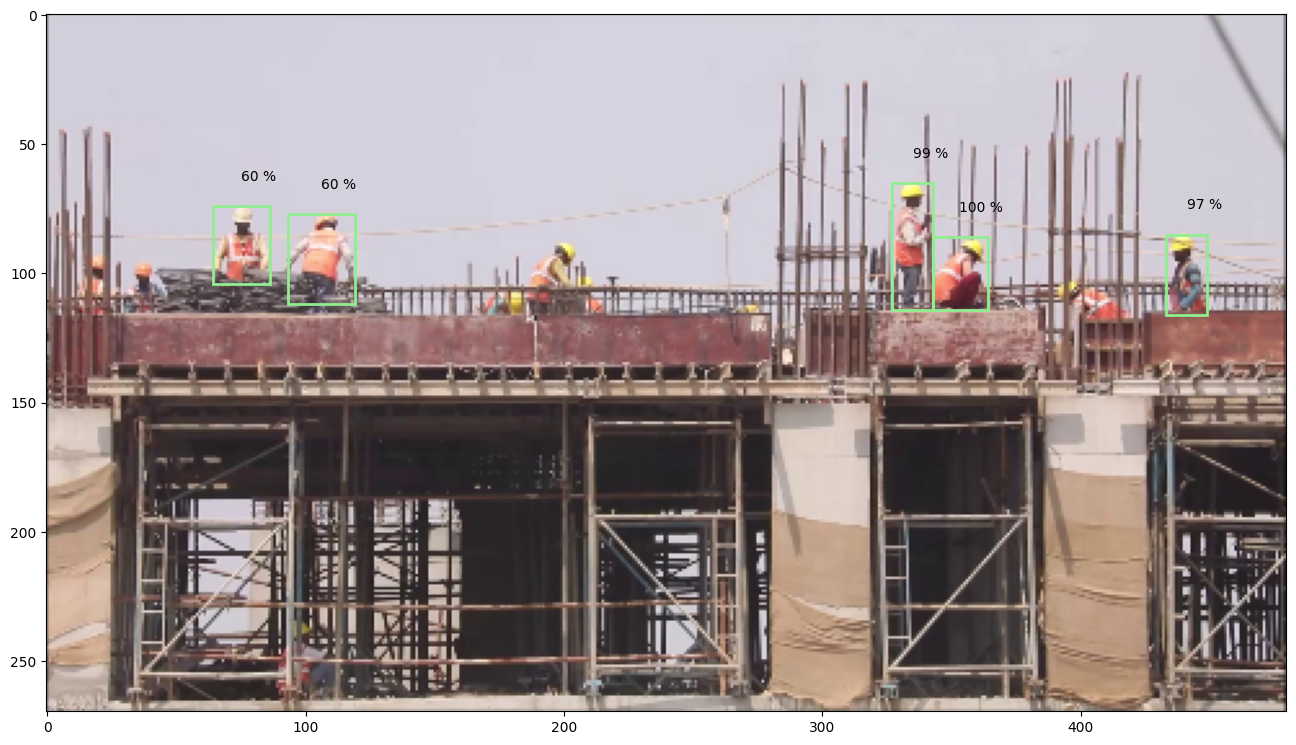

In [38]:
cap = cv.VideoCapture(TestVideoPos)

ret, img = cap.read()
fig = GetPrediction(img)
fig

In [39]:
(480, int(480 * Height / Width))

(480, 270)